<a href="https://colab.research.google.com/github/sharon-1234/Fmml/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

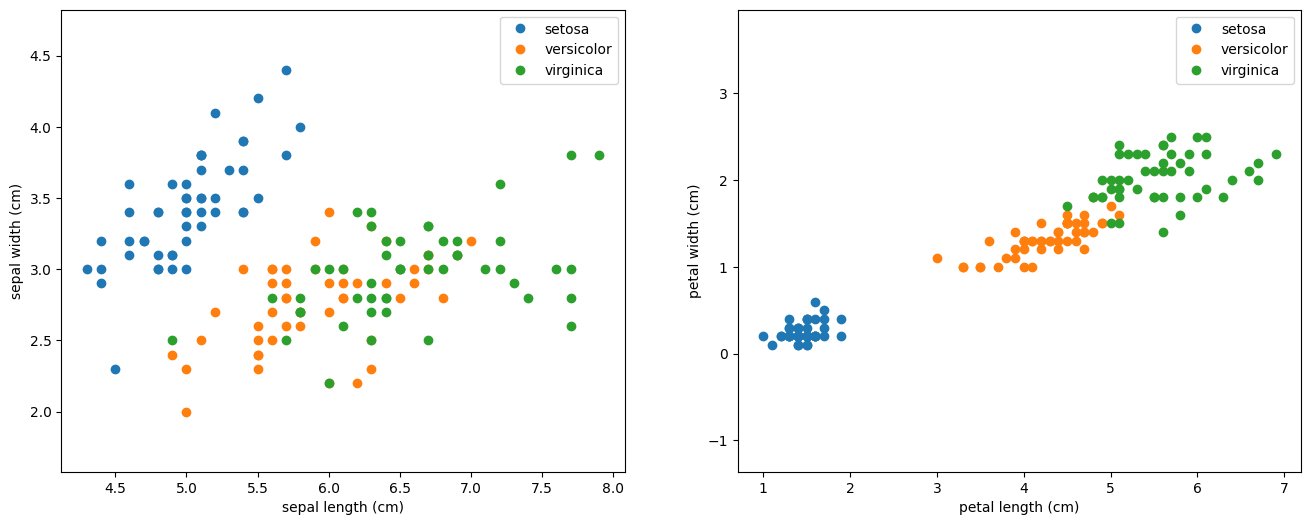

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 299.20it/s]


# Plot training progress

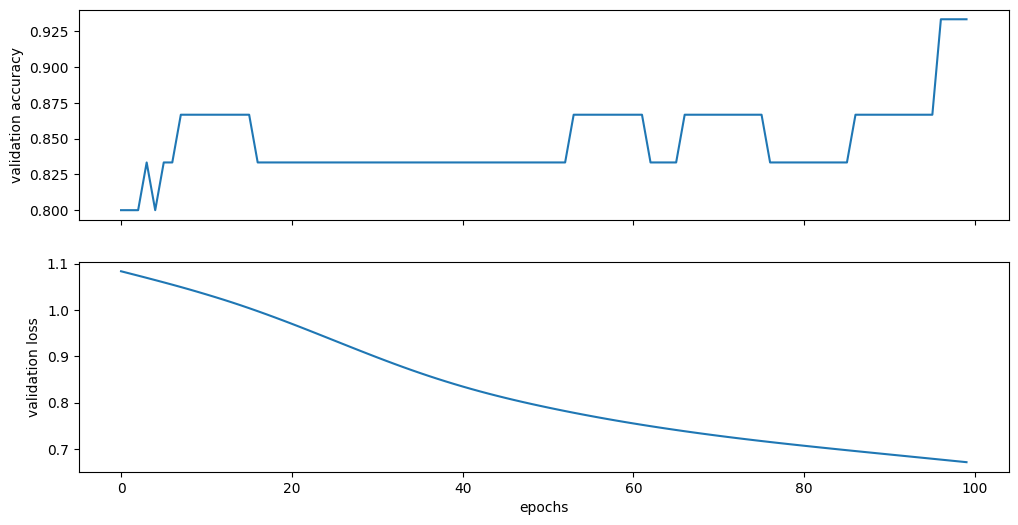

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

1) ANSWER:

*Single Hidden Layer:

This is the simplest form of a feedforward neural network.
It has one layer of neurons between the input and output layers.

*Multiple Hidden Layers:

Introducing more hidden layers allows the network to learn increasingly complex representations of the data.
Each additional layer can capture higher-level features from the input data.

*In practice, the choice of the number of hidden layers depends on various factors including the complexity of the problem, the size of the dataset, computational resources, and the trade-off between model complexity and generalization performance.




2)ANSWER:

*Fewer Neurons:

A smaller number of neurons in the hidden layer may result in lower model complexity and fewer parameters to train.
This can lead to simpler models that are less prone to overfitting, especially when dealing with small datasets or when regularization techniques are not heavily employed.

*Rule of Thumb:

There's no one-size-fits-all rule for determining the number of neurons in the hidden layer. It depends on factors like the complexity of the problem, the size of the dataset, and computational resources available.

In summary, adjusting the number of neurons in the hidden layer is a critical aspect of neural network design, and finding the right balance is key to building effective models for various tasks.




3)ANSWER:

1. **ReLU (Rectified Linear Unit)**:
   - \( f(x) = \max(0, x) \)
   - Pros: Simple and computationally efficient. Helps alleviate the vanishing gradient problem. Works well in many scenarios, especially in deep learning architectures.
   - Cons: Can suffer from the "dying ReLU" problem where neurons may become inactive and stop learning if they consistently output zero.

2. **Sigmoid**:
   - \( f(x) = \frac{1}{1 + e^{-x}} \)
   - Pros: Squashes the output between 0 and 1, which can be interpreted as probabilities. Useful in binary classification tasks.
   - Cons: Prone to vanishing gradient problem, especially in deep networks. Outputs are not zero-centered, which can slow down gradient descent.

3. **Tanh (Hyperbolic Tangent)**:
   - \( f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \)
   - Pros: Similar to sigmoid but outputs values in the range [-1, 1], making it zero-centered. Useful in scenarios where zero-centered data is preferred.
   - Cons: Still suffers from the vanishing gradient problem.

4. **Leaky ReLU**:
   - \( f(x) = \max(\alpha x, x) \), where \( \alpha \) is a small constant (e.g., 0.01)
   - Pros: Addresses the dying ReLU problem by allowing a small gradient when \( x < 0 \), encouraging the activation to learn even for negative inputs.
   - Cons: Adds a hyperparameter (\( \alpha \)) that needs to be tuned.

5. **Softmax**:
   - \( f(x_i) = \frac{e^{x_i}}{\sum_{j}^{ } e^{x_j}} \) for \( i = 1, ..., N \), where \( N \) is the number of classes.
   - Pros: Useful for multi-class classification tasks as it converts raw scores into probabilities that sum up to 1.
   - Cons: Not suitable for regression or binary classification tasks.

6. **Swish**:
   - \( f(x) = x \cdot \sigma(\beta x) \), where \( \sigma \) is the sigmoid function.
   - Pros: Empirically shown to perform well in various scenarios, potentially better than ReLU.
   - Cons: Adds a hyperparameter (\( \beta \)) that needs to be tuned.

The network architecture. Experimentation and empirical validation are often necessary to determine the most suitable activation function for a given task.